# Deliverable 1
## TODO: idk where to use or where to put this sections of code

## Part 1

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from numpy import linalg as la

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/just_riccio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    """
    Preprocess a text by tokenizing, lowercasing, removing stop words, and stemming.
    TODO: add bonus points preprocessing (spelling correction, normalizing numbers, 
    synonym replacement / word normalization, etc.)
    """
    
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stem the tokens
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return tokens

def preprocess_non_textual(document):
    # TODO: preprocess non-textual parts of the document (e.g., numerical data normalization)
    # based on the remaining part of this notebook (section 3 and 4)
    return document

def preprocess_document(document):
    """
    For each textual part of the document, preprocess it
    """

    document.processed_description = preprocess_text(document.description)
    document.processed_title = preprocess_text(document.title)

    document = preprocess_non_textual(document)

    return document


## Section 3
Pros of keeping separate: end user can easily filter products (i.e. if category / sub-category / brand fully matches user filter, product is relevant, otherwise it's not)

Cons of keeping separate: more computation to check general relevance of products

Pros of merging: every aspect of the product helps with relevance (e.g. user can query (not filter) for brands, and the most relevant products will be the one with the user requested brands, but other products, which might still be useful for the user, could still be relevant)

Cons of merging: you lose the option to filter


Maybe some fields could be saved in the inverted index tree using one-hot encoding, to try a hybrid approach, depending on how one wants to build its retrieval engine

## Section 4
out_of_stock: boolean -> if it is out of stock, do not consider this product
selling_price: numerical -> used to filer
discount: numerical -> used to calculate new selling price then filter (could be split into two fields: is_discounted (boolean), discount_value (numerical))
actual_price: numerical -> idk what this is
average_rating: numerical -> filter

## Part 2

In [8]:
# Exploratory Data Analysis

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = "data/fashion_products_dataset.json"  # TODO: fix path to use env variables

# Open and load JSON file
with open(file_path, "r") as f:
    data = json.load(f)
    df = pd.DataFrame(data)

print(df.head())


                                    _id actual_price average_rating brand  \
0  fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a        2,999            3.9  York   
1  893e6980-f2a0-531f-b056-34dd63fe912c        1,499            3.9  York   
2  eb4c8eab-8206-59d0-bcd1-a724d96bf74f        2,999            3.9  York   
3  3f3f97bb-5faf-57df-a9ff-1af24e2b1045        2,999            3.9  York   
4  750caa3d-6264-53ca-8ce1-94118a1d8951        2,999            3.9  York   

                   category     crawled_at  \
0  Clothing and Accessories  1612987911000   
1  Clothing and Accessories  1612987912000   
2  Clothing and Accessories  1612987912000   
3  Clothing and Accessories  1612987913000   
4  Clothing and Accessories  1612987913000   

                                         description discount  \
0  Yorker trackpants made from 100% rich combed c...  69% off   
1  Yorker trackpants made from 100% rich combed c...  66% off   
2  Yorker trackpants made from 100% rich combed c...  68% off   


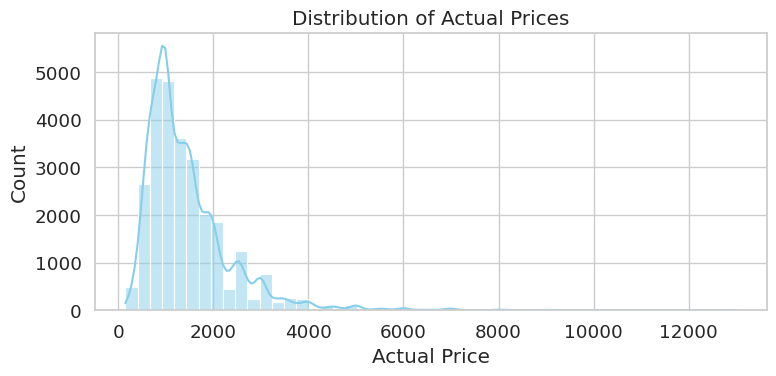

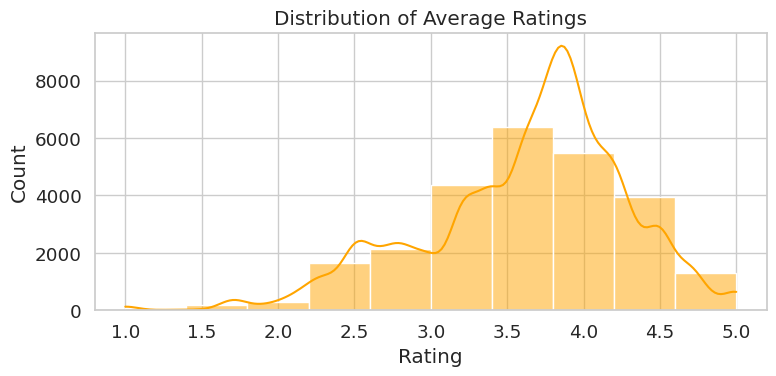

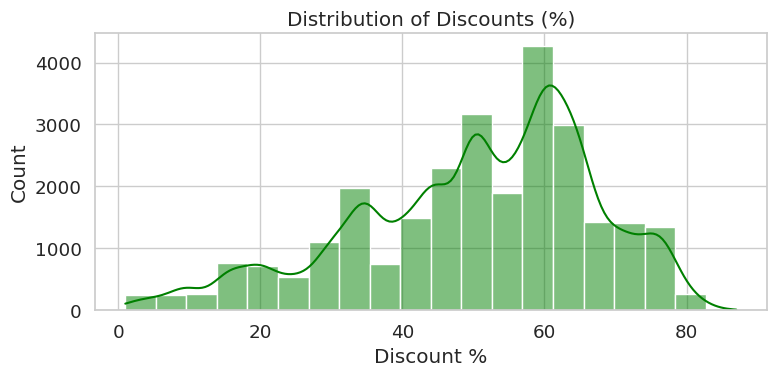

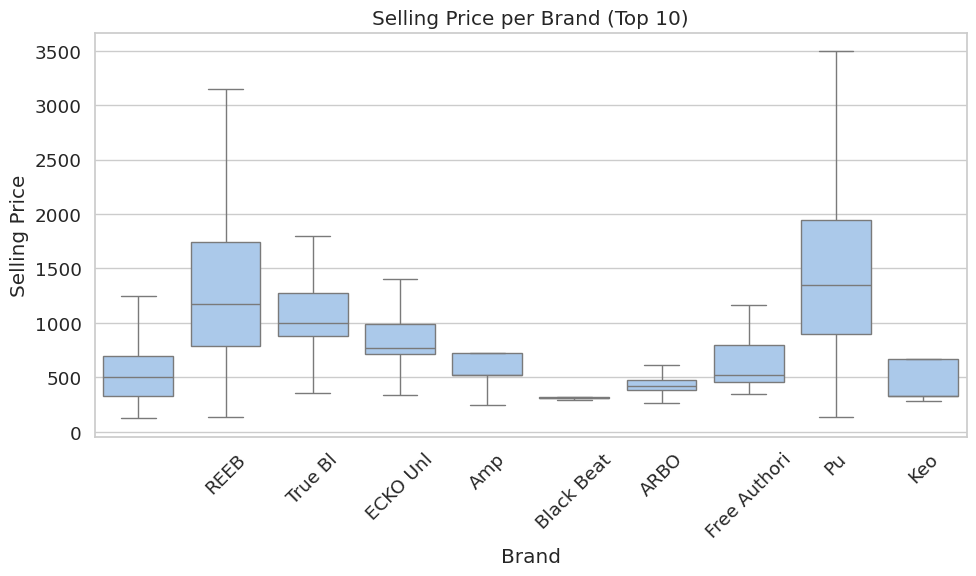

In [ ]:
# Convert columns to numeric as before
df["actual_price"] = pd.to_numeric(df["actual_price"].astype(str).str.replace(r"[^\d.]", "", regex=True), errors="coerce")
df["average_rating"] = pd.to_numeric(df["average_rating"], errors="coerce")
df["discount"] = pd.to_numeric(df["discount"].astype(str).str.replace(r"[^\d.]", "", regex=True), errors="coerce")
df["selling_price"] = pd.to_numeric(df["selling_price"].astype(str).str.replace(r"[^\d.]", "", regex=True), errors="coerce")

# Set a nicer style
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Actual Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["actual_price"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Actual Prices")
plt.xlabel("Actual Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Ratings Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["average_rating"], bins=10, kde=True, color="orange")
plt.title("Distribution of Average Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Discounts Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["discount"], bins=20, kde=True, color="green")
plt.title("Distribution of Discounts (%)")
plt.xlabel("Discount %")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Selling price per brand (top 10 brands)
top_brands = df["brand"].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(x="brand", y="selling_price", data=df[df["brand"].isin(top_brands)], showfliers=False)
plt.title("Selling Price per Brand (Top 10)")
plt.xlabel("Brand")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Basic Data Exploratory Analysis

# 1. Overview of missing values
print("Missing values per column:\n", df.isnull().sum())

# 2. Number of unique brands, categories, sub-categories
print("\nUnique brands:", df['brand'].nunique())
print("Unique categories:", df['category'].nunique())
print("Unique sub-categories:", df['sub_category'].nunique())

# 3. Top 10 brands by product count
print("\nTop 10 brands by product count:\n", df['brand'].value_counts().head(10))

# 4. Distribution of products by category
print("\nProduct count by category:\n", df['category'].value_counts())

# 5. Distribution of products by sub-category (top 10)
print("\nTop 10 sub-categories by product count:\n", df['sub_category'].value_counts().head(10))

# 6. Out of stock ratio
out_of_stock_ratio = df['out_of_stock'].mean()
print(f"\nOut of stock ratio: {out_of_stock_ratio:.2%}")

# 7. Summary statistics for prices and ratings
print("\nSummary statistics for actual_price, selling_price, discount, average_rating:")
print(df[['actual_price', 'selling_price', 'discount', 'average_rating']].describe())

Missing values per column:
 _id                   0
actual_price        777
average_rating     2261
brand                 0
category              0
crawled_at            0
description           0
discount            855
images                0
out_of_stock          0
pid                   0
product_details       0
seller                0
selling_price         2
sub_category          0
title                 0
url                   0
dtype: int64
28080

Unique brands: 325
Unique categories: 4
Unique sub-categories: 24

Top 10 brands by product count:
 brand
                2009
ECKO Unl         951
Free Authori     860
ARBO             806
REEB             802
Pu               798
True Bl          793
Keo              660
Amp              585
Black Beat       548
Name: count, dtype: int64

Product count by category:
 category
Clothing and Accessories    27118
Footwear                      920
Bags, Wallets & Belts          41
Toys                            1
Name: count, dtype: int64

T

In [14]:
# Find products with missing selling_price, actual_price, or discount
missing_prices = df[df['selling_price'].isnull() | df['actual_price'].isnull() | df['discount'].isnull()]

# Print the number of such products
print(f"Number of products with missing selling_price, actual_price, or discount: {len(missing_prices)}")

# Show a few examples
print(missing_prices[['title', 'brand', 'selling_price', 'actual_price', 'discount']].head(10))

Number of products with missing selling_price, actual_price, or discount: 855
                                                  title brand  selling_price  \
1705                 Solid Women Polo Neck Blue T-Shirt  REEB         1099.0   
1734                           Men Striped Ankle Length  REEB          499.0   
1891                       Solid Women Grey Track Pants  REEB         1499.0   
1922                   Full Sleeve Solid Men Sweatshirt  REEB         2399.0   
1949                         Solid Men Grey Track Pants  REEB         1499.0   
1950                  Solid Men Polo Neck Green T-Shirt  REEB         1299.0   
1953                Full Sleeve Solid Men Sports Jacket  REEB         3699.0   
1958                  Solid Men Polo Neck Green T-Shirt  REEB         1599.0   
1964  Original Cotton Half Cushion Women Ankle Lengt...  REEB          399.0   
2020         Printed Women Round Neck Dark Blue T-Shirt  REEB         3999.0   

      actual_price  discount  
1705      

In [18]:
def impute_actual_price(row):
    # if there is no actual price, try to compute it:
    # either from selling price and discount, or just use selling price
    if pd.isnull(row['actual_price']):
        if not pd.isnull(row['selling_price']) and not pd.isnull(row['discount']):
            return row['selling_price'] * (1 - row['discount'] / 100)
        elif not pd.isnull(row['selling_price']):
            return row['selling_price']
    return row['actual_price']

df['actual_price'] = df.apply(impute_actual_price, axis=1)
df['discount'] = df['discount'].fillna(0)
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 _id                   0
actual_price          2
average_rating     2261
brand                 0
category              0
crawled_at            0
description           0
discount              0
images                0
out_of_stock          0
pid                   0
product_details       0
seller                0
selling_price         2
sub_category          0
title                 0
url                   0
dtype: int64


In [20]:
# Drop products with missing actual_price or selling_price
df = df.dropna(subset=['actual_price', 'selling_price'])
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 _id                   0
actual_price          0
average_rating     2259
brand                 0
category              0
crawled_at            0
description           0
discount              0
images                0
out_of_stock          0
pid                   0
product_details       0
seller                0
selling_price         0
sub_category          0
title                 0
url                   0
dtype: int64


We have done some data cleaning, there are still some products that do not have average rating. For the moment we are just keeping those values, we will decide later what to do with this values. Besides, we could drop crawled_at and images, but for now we keep them.